In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def mTASEP(L=10, a=0.3, b=0.3, P=0.3, timesteps=100, multi=10):
    """
    A basic TASEP(Totally Asimmetric Simple Exclusion Process) that creates a lattice(l) of lenght(L) 
    over time(timesteps) in an 2D array l. This function reads l at time t and edit time t+1.
    A ribosome or a 1 enter to l with (a) probability if the first space is empty, if there are a 1 in the first position
    is copied to t+1. The 1s moves over l with (P) probability only if there 0 in the next position so they can not move
    if there another 1 in front of them. Finally the 1s get out from l with (b) probability.
    The code is ejecuted (multi times where the final l is summed to (stored_l) and then this array is divided by m 
    to get the average ocupancy over all the positions.
    Show some relevant data.
    """
    stored_l=np.zeros((timesteps,L))
    for m in range(multi):
        #lattice
        l = np.zeros((timesteps,L))
        #timesteps, iterate the function over time, use t0 and modify t1
        for t in range(timesteps-1):
            #income 
            if l[t,0] == 0:
                if np.random.uniform(0,1) <= a:
                    l[t+1,0] = 1
            #copy the ones that doest move from t to t+1            
            else:
                l[t+1,0] = 1        

            #jump, for each 1 in lattice that has a 0 at the righ throw the dice and see if it can jump
            for w in range(L-1): #L-1 to not outcome without b
                if l[t,w] == 1 and l[t,w+1] == 0:    
                    if np.random.uniform(0,1) <= P:
                            l[t+1,w] = 0
                            l[t+1,w+1] = 1
                    else:
                        l[t+1,w] = 1
                elif l[t,w] == 1 and l[t,w+1] == 1:
                     l[t+1,w] = 1

            #outcome  
            if l[t,-1] == 1:
                if np.random.uniform(0,1) <= b:
                    l[t+1,-1] = 0            
                else:
                    l[t+1,-1] = 1   
            #End TASEP loop
        stored_l = stored_l + l
        #stored_l/m is the new work array
    #End multi loop

    #Showing Data
    plt.imshow(stored_l/m)
    plt.axes().set_aspect('auto')
    plt.xlabel('Position')
    plt.ylabel('TimeStep')
    plt.suptitle('Where are my ribosomes')
    #color bar
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.show()

    #Tell me what's going on fast
    plt.subplot(223)
    plt.plot(np.arange(len(np.mean (stored_l/m,0))), np.mean (stored_l/m,0), 'ro')
    plt.axis()
    plt.xlabel('Position')
    plt.ylabel('Ribosome Mean')

    plt.subplot(221)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), np.mean (stored_l/m,1), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('AvRibosomes/l')
    plt.suptitle('Whats going on')

    plt.subplot(222)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), P*(np.mean (l,1))*(1-np.mean (stored_l/m,1)), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('J')
    plt.show()

    print("Average J =", P*np.mean (stored_l/m,(0,1))*(1-np.mean (stored_l/m,(0,1))))

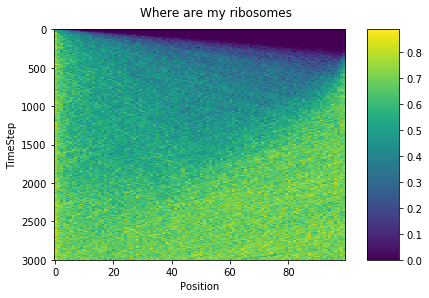

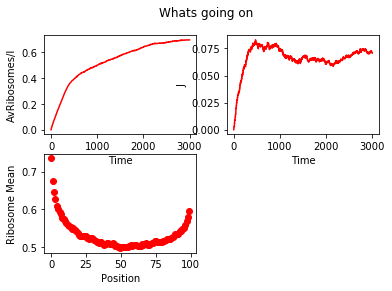

Average J = 0.0746977454297


In [3]:
#mTASEP(L,a,b,P,timesteps,multi)
mTASEP(100,0.3,0.1,0.3,3000,100)